In [1]:
%%bash
mkdir ~/.kaggle
cp kaggle.json ~/.kaggle/kaggle.json
chmod 600 ~/.kaggle/kaggle.json
pip install kaggle
kaggle datasets download -d andrewmvd/road-sign-detection
unzip road-sign-detection.zip -d data
mv ./data/annotations ./data/labels


Archive:  road-sign-detection.zip
  inflating: data/annotations/road0.xml  
  inflating: data/annotations/road1.xml  
  inflating: data/annotations/road10.xml  
  inflating: data/annotations/road100.xml  
  inflating: data/annotations/road101.xml  
  inflating: data/annotations/road102.xml  
  inflating: data/annotations/road103.xml  
  inflating: data/annotations/road104.xml  
  inflating: data/annotations/road105.xml  
  inflating: data/annotations/road106.xml  
  inflating: data/annotations/road107.xml  
  inflating: data/annotations/road108.xml  
  inflating: data/annotations/road109.xml  
  inflating: data/annotations/road11.xml  
  inflating: data/annotations/road110.xml  
  inflating: data/annotations/road111.xml  
  inflating: data/annotations/road112.xml  
  inflating: data/annotations/road113.xml  
  inflating: data/annotations/road114.xml  
  inflating: data/annotations/road115.xml  
  inflating: data/annotations/road116.xml  
  inflating: data/annotations/road117.xml  
  i

In [2]:
!git clone https://github.com/ultralytics/yolov5

100%|██████████| 218M/218M [00:02<00:00, 84.2MB/s]


Cloning into 'yolov5'...
remote: Enumerating objects: 16525, done.
remote: Total 16525 (delta 0), reused 0 (delta 0), pack-reused 16525
Receiving objects: 100% (16525/16525), 15.00 MiB | 19.82 MiB/s, done.
Resolving deltas: 100% (11361/11361), done.


In [3]:
cd yolov5

/content/yolov5


In [4]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 749.5/749.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [5]:
cd ..


/content


In [6]:
ls


data/  kaggle.json  road-sign-detection.zip  sample_data/  yolov5/


In [7]:
import xml.etree.ElementTree as ET
import os
from tqdm import tqdm
import pandas as pd

In [8]:
input_path = 'data'
output_path = 'yolov5'


In [9]:
annotations_path = os.path.join(input_path, 'labels')
annotations = os.listdir(annotations_path)

In [10]:
img_name_list = []
width_list = []
height_list = []
label_list = []
xmin_list = []
ymin_list = []
xmax_list = []
ymax_list = []

for idx in tqdm(range(len(annotations))):

    tree = ET.parse(os.path.join(annotations_path, annotations[idx]))
    root = tree.getroot()

    img_name = root.find('filename').text

    size = root.find('size')
    width = size.find('width').text
    height = size.find('height').text

    for group in root.findall('object'):
        label = group.find('name').text
        bbox = group.find('bndbox')
        xmin = bbox.find('xmin').text
        ymin = bbox.find('ymin').text
        xmax = bbox.find('xmax').text
        ymax = bbox.find('ymax').text

        img_name_list.append(img_name)
        width_list.append(width)
        height_list.append(height)
        xmin_list.append(xmin)
        ymin_list.append(ymin)
        xmax_list.append(xmax)
        ymax_list.append(ymax)
        label_list.append(label)

100%|██████████| 877/877 [00:00<00:00, 1963.72it/s]


In [11]:
labels_df = pd.DataFrame({
                        'img_name': img_name_list,
                        'width': width_list,
                        'height': height_list,
                        'xmin': xmin_list,
                        'ymin': ymin_list,
                        'xmax': xmax_list,
                        'ymax': ymax_list,
                        'label': label_list})
labels_df.head()

,img_name,width,height,xmin,ymin,xmax,ymax,label
0,road651.png,300,400,177,113,221,160,speedlimit
1,road123.png,400,302,151,73,271,195,crosswalk
2,road30.png,400,267,40,6,101,121,trafficlight
3,road630.png,300,400,127,144,154,171,stop
4,road608.png,300,400,77,305,107,337,speedlimit


In [12]:
!pip install pybboxes

In [13]:
import numpy as np
import pandas as pd
import os
import pybboxes as pbx
from collections import defaultdict
from tqdm import tqdm
import shutil

In [14]:
classes = labels_df['label'].unique().tolist()
classes

['speedlimit', 'crosswalk', 'trafficlight', 'stop']

In [15]:
## Add class number associated to classes
labels_df['class'] = labels_df['label'].apply(lambda x: classes.index(x))
labels_df.head()

,img_name,width,height,xmin,ymin,xmax,ymax,label,class
0,road651.png,300,400,177,113,221,160,speedlimit,0
1,road123.png,400,302,151,73,271,195,crosswalk,1
2,road30.png,400,267,40,6,101,121,trafficlight,2
3,road630.png,300,400,127,144,154,171,stop,3
4,road608.png,300,400,77,305,107,337,speedlimit,0


In [16]:
## Generate dictionary where key is image_name and value is list of all bboxes inforamtion
img_dict = defaultdict(list)

for idx in tqdm(range(len(labels_df))):
    sample_label_list = []
    img_name = labels_df.loc[idx, 'img_name']
    xmin = labels_df.loc[idx, 'xmin']
    ymin = labels_df.loc[idx, 'ymin']
    xmax = labels_df.loc[idx, 'xmax']
    ymax = labels_df.loc[idx, 'ymax']
    class_num = labels_df.loc[idx, 'class']
    W, H = int(labels_df.loc[idx, 'width']), int(labels_df.loc[idx, 'height'])

    voc_bbox = (int(xmin), int(ymin) ,int(xmax), int(ymax))

    x_center, y_center, w, h = pbx.convert_bbox(voc_bbox, from_type="voc", to_type="yolo", image_size=(W,H))

    sample_label_list.append(str(class_num))
    sample_label_list.append(str(x_center))
    sample_label_list.append(str(y_center))
    sample_label_list.append(str(w))
    sample_label_list.append(str(h))
    line = ' '.join(sample_label_list)

    img_dict[img_name].append(line)

100%|██████████| 1244/1244 [00:00<00:00, 1985.25it/s]


In [17]:
# make labels dir in data folder of yolov5
labels_dir = f'{output_path}/data/labels'
if os.path.exists(labels_dir):
    shutil.rmtree(labels_dir)
os.mkdir(labels_dir)

In [18]:
## Generate .txt file for each image
for img_name, lines in img_dict.items():
    img_name = img_name.split('.')[0]
    with open(f'{labels_dir}/{img_name}.txt', 'w') as f:
        for line in lines:
            f.write(line)
            f.write('\n')

In [19]:
import os
import shutil
from random import shuffle

In [20]:
images_path = input_path + '/images'
labels_path = labels_dir

In [21]:
# create train , val folders in data directory of yolov5
train_dir = output_path + '/data/train'
val_dir = output_path + '/data/val'

if os.path.exists(train_dir):
    shutil.rmtree(train_dir)

if os.path.exists(val_dir):
    shutil.rmtree(val_dir)

os.mkdir(train_dir)
os.mkdir(val_dir)

# train, val each containing images and labels folders
os.mkdir(train_dir + '/images')
os.mkdir(train_dir + '/labels')
os.mkdir(val_dir + '/images')
os.mkdir(val_dir + '/labels')

In [22]:
# Shuffle image file names before splitting into train and val data
files = os.listdir(images_path)
shuffle(files)

In [23]:
def split(files, ratio):
    elements = len(files)
    middle = int(elements * ratio)
    return [files[:middle], files[middle:]]

def copy_files(images_path, labels_path, destination_path, files):

    for file_name in files:
        file_name = file_name.split('.')[0]

        src = images_path + f'/{file_name}.png'
        dst = destination_path + '/images'
        shutil.copy(src, dst)

        src = labels_path + f'/{file_name}.txt'
        dst = destination_path + '/labels'
        shutil.copy(src, dst)

In [24]:
images_path, labels_path, train_dir

('data/images', 'yolov5/data/labels', 'yolov5/data/train')

In [25]:
# Split and copy files in train and val folder
train_ratio = 0.75
train_files, val_files = split(files, train_ratio)

root = 'data/traffic_sign_data'

copy_files(images_path, labels_path, train_dir, train_files)
copy_files(images_path, labels_path, val_dir, val_files)

In [26]:
assert (len(os.listdir(train_dir + '/images')) + len(os.listdir(val_dir + '/images')) == len(os.listdir(images_path)))

In [27]:
with open(f'{output_path}/data/sign_data.yaml', 'w') as f:
    f.write('train: ../data/train/images\n')
    f.write('val: ../data/val/images\n')
    f.write('nc: 4\n')
    f.write(f"names: {classes}")

In [28]:
epochs = 20
!python yolov5/train.py --img 640 --batch 16 --epochs {epochs} --data sign_data.yaml --weights yolov5s.pt

2024-04-06 08:10:49.701241: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-06 08:10:49.701293: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-06 08:10:49.820240: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=sign_data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5/data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, sing

In [33]:
ls


12.jpg  14.jpg  kaggle.json              sample_data/  yolov5s.pt
13.jpg  data/   road-sign-detection.zip  yolov5/


In [29]:
# results stored in runs/train
# get the last stored result
exp = sorted(os.listdir(output_path + '/runs/train'))[-1]
exp_path = output_path + '/runs/train/' + exp

In [30]:
os.listdir(exp_path)

['confusion_matrix.png',
 'weights',
 'hyp.yaml',
 'results.csv',
 'val_batch0_labels.jpg',
 'events.out.tfevents.1712391052.86963130bb07.1606.0',
 'val_batch1_pred.jpg',
 'F1_curve.png',
 'R_curve.png',
 'P_curve.png',
 'labels_correlogram.jpg',
 'opt.yaml',
 'val_batch2_labels.jpg',
 'val_batch0_pred.jpg',
 'train_batch0.jpg',
 'val_batch2_pred.jpg',
 'PR_curve.png',
 'results.png',
 'val_batch1_labels.jpg',
 'train_batch1.jpg',
 'labels.jpg',
 'train_batch2.jpg']

In [47]:
!python yolov5/detect.py --source /content/15.png --img-size 640 --conf 0.4 --weights /content/yolov5/runs/train/exp/weights/last.pt


detect: weights=['/content/yolov5/runs/train/exp/weights/last.pt'], source=/content/15.png, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/15.png: 320x640 1 stop, 58.0ms
Speed: 0.5ms pre-process, 58.0ms inference, 525.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp7


In [31]:
import matplotlib.pyplot as plt
from PIL import Image

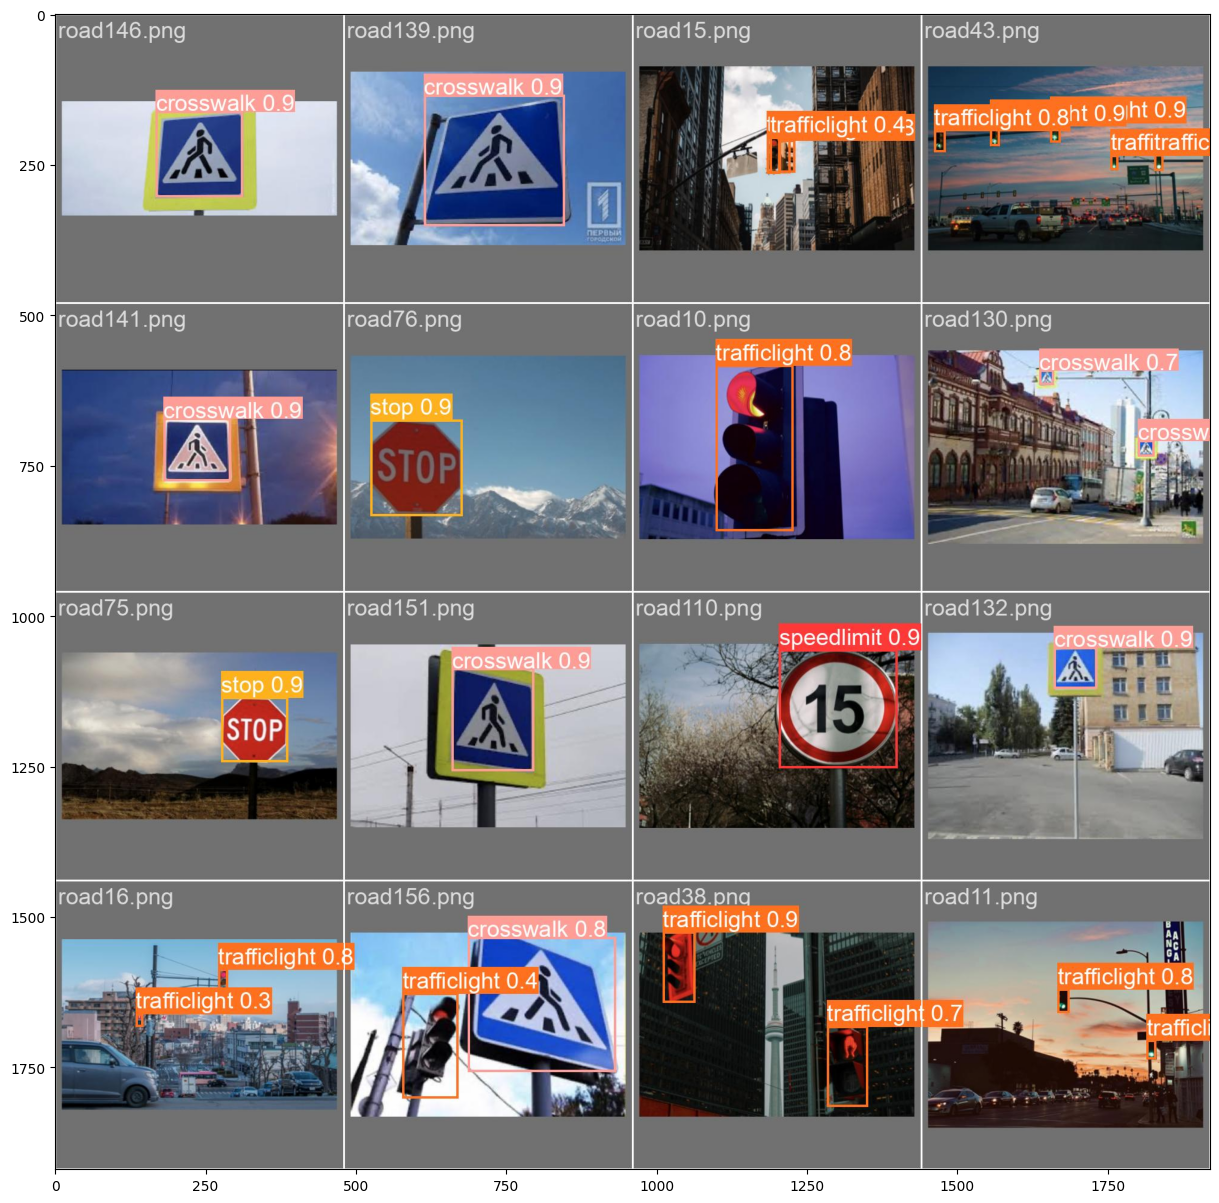

In [32]:
img_path = exp_path + '/val_batch0_pred.jpg'
img = Image.open(img_path)
plt.figure(figsize=(15, 15))
plt.imshow(img)